Keras tutorial: https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/

Control overfitting:
https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323

Losses: https://www.tensorflow.org/api_docs/python/tf/keras/losses

Metrics: https://www.tensorflow.org/api_docs/python/tf/keras/metrics

In [1]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import numpy as np
import pandas as pd
import random


# mount google drive
from google.colab import drive
drive.mount( '/content/drive', force_remount=True )

path = '/content/drive/Shareddrives/Machine Learning/'
data_path = path + 'data/'
code_path = path + 'code/'
mlp_path = path + 'code/MLP/'


# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input, Concatenate
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras


# sklearn
import sklearn
import sklearn.model_selection
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

# custom libs
import sys
sys.path.append( code_path )
from load_dataframe import load_dataframe
from confusionMatrix import plot_confusion_matrix


# plot
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [3]:
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

#Load Dataset

In [4]:
df = load_dataframe( data_path + 'features.npz', data_path + 'name_class.csv')
df

Number of features:  1280
Original number of examples:  19520
Final number of examples:  18748


,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,class,img_name
0,1.110234,1.507227,0.000000,0.000000,0.118538,0.000000,0.611660,0.000000,0.216659,0.0,...,0.000000,0.582409,0.000000,0.000000,0.000000,0.292292,0.080777,0.342733,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...
1,0.377716,0.804323,0.000000,0.044572,0.469181,0.000000,1.109573,0.000000,0.427474,0.0,...,0.018944,0.851525,0.000000,0.239364,0.111541,0.000000,0.363659,0.683264,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...
2,1.291019,0.071864,0.177774,1.815525,0.103777,0.035584,0.019683,0.000000,0.000000,0.0,...,0.000000,0.226819,0.000000,0.445593,0.652496,0.022925,0.000000,0.357433,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...
3,0.390894,0.746412,0.039011,0.298714,1.402811,0.000000,0.052603,0.098031,0.058295,0.0,...,0.004990,0.480598,0.000000,0.000000,1.700429,0.416542,0.039750,2.452053,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...
4,1.896747,0.958916,0.002194,0.096892,0.260261,0.000000,0.861980,0.043710,0.040442,0.0,...,0.079554,0.058523,0.000000,0.100710,0.003879,0.023642,0.020626,0.359759,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19515,1.871393,0.029213,0.014800,0.133898,0.575956,0.007906,1.623018,0.036280,0.148290,0.0,...,0.157491,0.111809,0.000000,0.000000,0.000000,0.119775,0.516047,0.480546,AD,ADNI_005_S_5119_MR_3_Plane_Localizer__br_raw_2...
19516,1.564297,0.221099,0.082338,0.298274,0.998126,0.056191,0.615134,0.011923,0.000000,0.0,...,0.023557,0.309992,0.033995,0.000000,0.000000,0.000000,0.042995,1.202192,AD,ADNI_005_S_5119_MR_3_Plane_Localizer__br_raw_2...
19517,1.563275,0.000000,0.020136,0.000000,1.708373,0.000000,1.741177,0.000000,0.000000,0.0,...,1.129568,0.582146,0.000000,0.000000,0.000000,0.000000,0.004952,1.216201,AD,ADNI_005_S_5119_MR_3_Plane_Localizer__br_raw_2...
19518,0.891854,0.019048,0.000000,0.053727,1.629335,0.000119,1.473030,0.012954,0.009639,0.0,...,1.383894,0.556205,0.000000,0.011428,0.025462,0.000000,0.000000,1.703292,AD,ADNI_005_S_5119_MR_3_Plane_Localizer__br_raw_2...


In [5]:
# Data distribution
classes = df["class"].unique()
distribution = np.array( [ [ c, len( df.loc[ df["class"] == c ].index ) ] for c in classes ] )

print( "Data distribution:\n", pd.DataFrame( distribution ) )

# Class codes
class_code = dict( zip( df["class"].astype('category').cat.categories, np.arange( 0, len( classes) ) ) )
print( "\nClass encoding: ", class_code )

Data distribution:
       0     1
0    CN  7058
1  LMCI  3121
2  EMCI  5812
3    AD  2757

Class encoding:  {'AD': 0, 'CN': 1, 'EMCI': 2, 'LMCI': 3}


In [6]:
# Encode classes
df["class_encoded"] = df["class"].astype('category').cat.codes
df

,0,1,2,3,4,5,6,7,8,9,...,1273,1274,1275,1276,1277,1278,1279,class,img_name,class_encoded
0,1.110234,1.507227,0.000000,0.000000,0.118538,0.000000,0.611660,0.000000,0.216659,0.0,...,0.582409,0.000000,0.000000,0.000000,0.292292,0.080777,0.342733,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...,1
1,0.377716,0.804323,0.000000,0.044572,0.469181,0.000000,1.109573,0.000000,0.427474,0.0,...,0.851525,0.000000,0.239364,0.111541,0.000000,0.363659,0.683264,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...,1
2,1.291019,0.071864,0.177774,1.815525,0.103777,0.035584,0.019683,0.000000,0.000000,0.0,...,0.226819,0.000000,0.445593,0.652496,0.022925,0.000000,0.357433,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...,1
3,0.390894,0.746412,0.039011,0.298714,1.402811,0.000000,0.052603,0.098031,0.058295,0.0,...,0.480598,0.000000,0.000000,1.700429,0.416542,0.039750,2.452053,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...,1
4,1.896747,0.958916,0.002194,0.096892,0.260261,0.000000,0.861980,0.043710,0.040442,0.0,...,0.058523,0.000000,0.100710,0.003879,0.023642,0.020626,0.359759,CN,ADNI_941_S_4292_MR_ADNI_gre_field_mapping_br_r...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19515,1.871393,0.029213,0.014800,0.133898,0.575956,0.007906,1.623018,0.036280,0.148290,0.0,...,0.111809,0.000000,0.000000,0.000000,0.119775,0.516047,0.480546,AD,ADNI_005_S_5119_MR_3_Plane_Localizer__br_raw_2...,0
19516,1.564297,0.221099,0.082338,0.298274,0.998126,0.056191,0.615134,0.011923,0.000000,0.0,...,0.309992,0.033995,0.000000,0.000000,0.000000,0.042995,1.202192,AD,ADNI_005_S_5119_MR_3_Plane_Localizer__br_raw_2...,0
19517,1.563275,0.000000,0.020136,0.000000,1.708373,0.000000,1.741177,0.000000,0.000000,0.0,...,0.582146,0.000000,0.000000,0.000000,0.000000,0.004952,1.216201,AD,ADNI_005_S_5119_MR_3_Plane_Localizer__br_raw_2...,0
19518,0.891854,0.019048,0.000000,0.053727,1.629335,0.000119,1.473030,0.012954,0.009639,0.0,...,0.556205,0.000000,0.011428,0.025462,0.000000,0.000000,1.703292,AD,ADNI_005_S_5119_MR_3_Plane_Localizer__br_raw_2...,0


In [7]:
# shuffle data
df = df.sample(frac=1)

# split data
X = df.drop( columns = ["class", "class_encoded", "img_name"] )
Y = df["class_encoded"].copy()

print('X shape: ',X.shape)
print('Y shape: ',Y.shape)

# split train and test data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( X, Y, test_size=0.1, random_state=0 )

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X shape:  (18748, 1280)
Y shape:  (18748,)
X_train shape:  (16873, 1280)
X_test shape:  (1875, 1280)


#Model

In [8]:
# determine the number of input features
n_features = X_train.shape[1]

def getModel():
  # define model

  input = Input(n_features)

  x = Dense( 128, activation='relu', kernel_initializer='he_normal')(input)
  x = Dropout(0.2, name='dropout_0.2')(x)
  x = Dense( 64, activation='relu', kernel_initializer='he_normal' )(x)
  x = Dense( 4, activation='softmax' )(x)

  model = Model(input, x, name = 'model')

  # compile the model
  opt = keras.optimizers.Adam( learning_rate=0.0001 )
  model.compile( optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  model.summary()

  return model

#Training

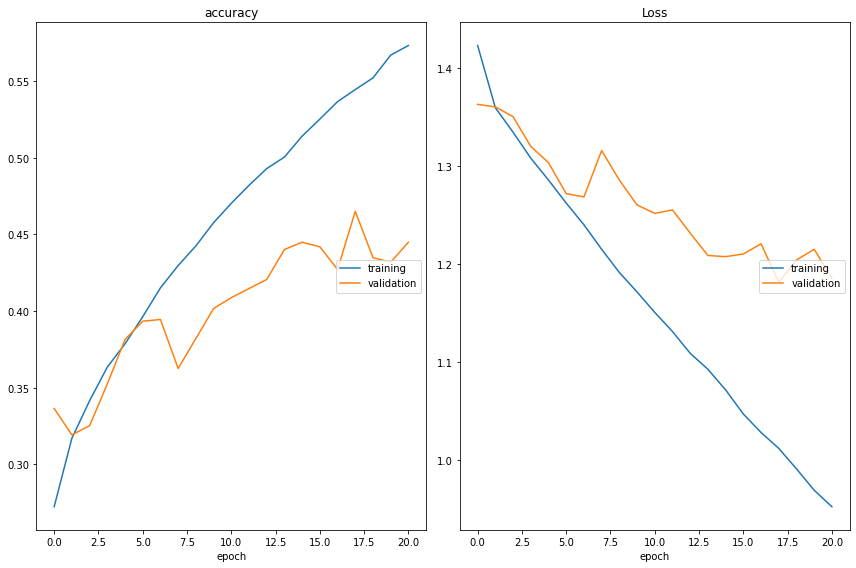

accuracy
	training         	 (min:    0.272, max:    0.573, cur:    0.573)
	validation       	 (min:    0.319, max:    0.465, cur:    0.445)
Loss
	training         	 (min:    0.952, max:    1.423, cur:    0.952)
	validation       	 (min:    1.181, max:    1.363, cur:    1.185)
475/475 [==============================] - 2s 4ms/step - loss: 0.9521 - accuracy: 0.5732 - val_loss: 1.1853 - val_accuracy: 0.4449
class_weights: {0: 1.7126471782379213, 1: 0.6652341901908216, 2: 0.803782393292683, 3: 1.4953030840127615}


In [9]:
# fit the model
print( "Fit model" )
model = getModel()

class_weights = class_weight.compute_class_weight('balanced',classes = np.unique(y_train), y=y_train)
print()

monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 3)

class_weights = dict(enumerate(class_weights.flatten()))
history = model.fit( X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.1, callbacks=[PlotLossesKeras(), monitor_val_acc], class_weight=class_weights)
print("class_weights:",class_weights)


#Evaluation metrics


Evaluate model
59/59 [==============================] - 0s 2ms/step - loss: 1.1974 - accuracy: 0.4512
Test Accuracy: 0.451


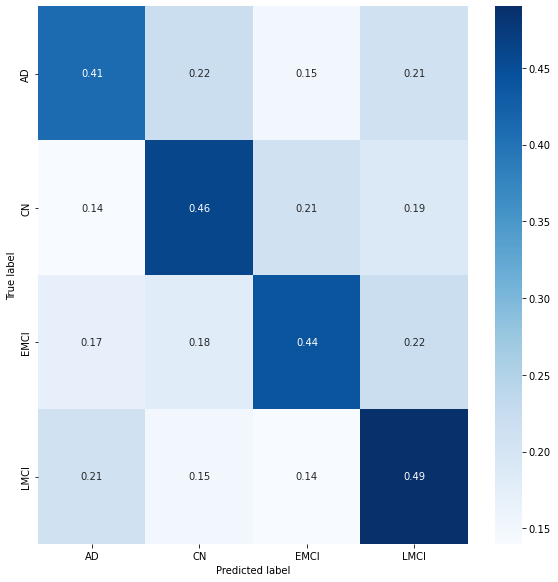

  class  Acurácia  Sensitividade  Especificidade
0    AD    0.7696         0.4150          0.8355
1    CN    0.6811         0.4603          0.8178
2  EMCI    0.7045         0.4362          0.8200
3  LMCI    0.7472         0.4933          0.7956


In [10]:
# evaluate the model
print( "\nEvaluate model" )
loss, acc = model.evaluate( X_test, y_test, verbose=1 )
print( 'Test Accuracy: %.3f' % acc )
y_pred = model.predict(X_test)

plot_confusion_matrix(y_test, np.argmax(y_pred, axis=1), list( class_code.keys() ))

ROC AUC score: 0.7167249107658731


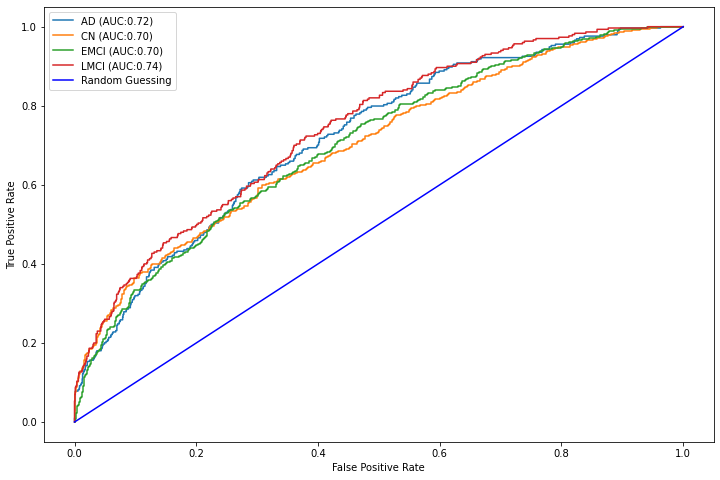

In [11]:
target = list( class_code.keys() )

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

#Plot model

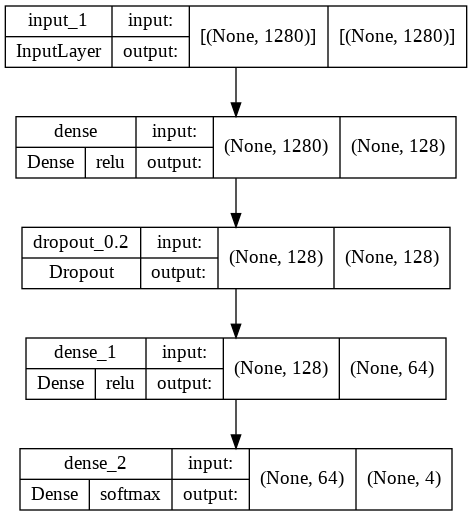

In [12]:
plot_model(model,show_shapes=True, show_layer_activations=True, show_layer_names=True)

#Save/Load Model

In [15]:
# save model to file
model.save(mlp_path + "MLP_" + "{:.4f}".format(acc) + '.h5')

In [16]:
model = keras.models.load_model(mlp_path + 'MLP_0.4512.h5')
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1280)]            0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout_0.2 (Dropout)       (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 172,484
Trainable params: 172,484
Non-trainable params: 0
_________________________________________________________________
None
